# CIS 4526 Sp24 HomeWork 3

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
Drive_path = "/content/drive/MyDrive/weather_data/"

In [7]:
cloud_set = ['/content/drive/MyDrive/weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'cloudy' in i]
rain_set = ['/content/drive/MyDrive/weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'rain' in i]
sunrise_set = ['/content/drive/MyDrive/weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'sunrise' in i]
sunshine_set = ['/content/drive/MyDrive/weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'shine' in i]

In [8]:
cloud_set

['/content/drive/MyDrive/weather_data/cloudy212.jpg',
 '/content/drive/MyDrive/weather_data/cloudy22.jpg',
 '/content/drive/MyDrive/weather_data/cloudy154.jpg',
 '/content/drive/MyDrive/weather_data/cloudy166.jpg',
 '/content/drive/MyDrive/weather_data/cloudy200.jpg',
 '/content/drive/MyDrive/weather_data/cloudy194.jpg',
 '/content/drive/MyDrive/weather_data/cloudy160.jpg',
 '/content/drive/MyDrive/weather_data/cloudy183.jpg',
 '/content/drive/MyDrive/weather_data/cloudy195.jpg',
 '/content/drive/MyDrive/weather_data/cloudy268.jpg',
 '/content/drive/MyDrive/weather_data/cloudy298.jpg',
 '/content/drive/MyDrive/weather_data/cloudy45 (1).jpg',
 '/content/drive/MyDrive/weather_data/cloudy270.jpg',
 '/content/drive/MyDrive/weather_data/cloudy282.jpg',
 '/content/drive/MyDrive/weather_data/cloudy269.jpg',
 '/content/drive/MyDrive/weather_data/cloudy243.jpg',
 '/content/drive/MyDrive/weather_data/cloudy295.jpg',
 '/content/drive/MyDrive/weather_data/cloudy45.jpg',
 '/content/drive/MyDrive/we

In [9]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [10]:
cloud_set

['/content/drive/MyDrive/weather_data/cloudy236.jpg',
 '/content/drive/MyDrive/weather_data/cloudy264.jpg',
 '/content/drive/MyDrive/weather_data/cloudy89.jpg',
 '/content/drive/MyDrive/weather_data/cloudy256.jpg',
 '/content/drive/MyDrive/weather_data/cloudy175.jpg',
 '/content/drive/MyDrive/weather_data/cloudy145.jpg',
 '/content/drive/MyDrive/weather_data/cloudy191.jpg',
 '/content/drive/MyDrive/weather_data/cloudy42.jpg',
 '/content/drive/MyDrive/weather_data/cloudy245.jpg',
 '/content/drive/MyDrive/weather_data/cloudy105.jpg',
 '/content/drive/MyDrive/weather_data/cloudy180.jpg',
 '/content/drive/MyDrive/weather_data/cloudy186.jpg',
 '/content/drive/MyDrive/weather_data/cloudy202.jpg',
 '/content/drive/MyDrive/weather_data/cloudy111.jpg',
 '/content/drive/MyDrive/weather_data/cloudy270.jpg',
 '/content/drive/MyDrive/weather_data/cloudy45.jpg',
 '/content/drive/MyDrive/weather_data/cloudy294.jpg',
 '/content/drive/MyDrive/weather_data/cloudy229.jpg',
 '/content/drive/MyDrive/weathe

In [11]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[150:] + sunshine_set[150:]

In [12]:
train_set

['/content/drive/MyDrive/weather_data/cloudy236.jpg',
 '/content/drive/MyDrive/weather_data/cloudy264.jpg',
 '/content/drive/MyDrive/weather_data/cloudy89.jpg',
 '/content/drive/MyDrive/weather_data/cloudy256.jpg',
 '/content/drive/MyDrive/weather_data/cloudy175.jpg',
 '/content/drive/MyDrive/weather_data/cloudy145.jpg',
 '/content/drive/MyDrive/weather_data/cloudy191.jpg',
 '/content/drive/MyDrive/weather_data/cloudy42.jpg',
 '/content/drive/MyDrive/weather_data/cloudy245.jpg',
 '/content/drive/MyDrive/weather_data/cloudy105.jpg',
 '/content/drive/MyDrive/weather_data/cloudy180.jpg',
 '/content/drive/MyDrive/weather_data/cloudy186.jpg',
 '/content/drive/MyDrive/weather_data/cloudy202.jpg',
 '/content/drive/MyDrive/weather_data/cloudy111.jpg',
 '/content/drive/MyDrive/weather_data/cloudy270.jpg',
 '/content/drive/MyDrive/weather_data/cloudy45.jpg',
 '/content/drive/MyDrive/weather_data/cloudy294.jpg',
 '/content/drive/MyDrive/weather_data/cloudy229.jpg',
 '/content/drive/MyDrive/weathe

In [13]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

/content/drive/MyDrive/weather_data/cloudy111.jpg


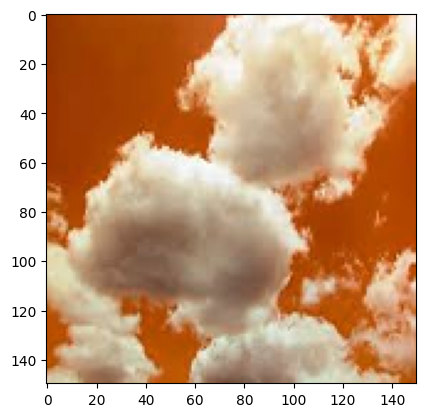

In [14]:
# Display some images
idx = 13
image = train_set[idx]
print(image)
# image = "data/weather_data/rain140.jpg"
# image ='/content/drive/MyDrive/weather_data/cloudy1.jpg'
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
# print(y)

In [15]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  /content/drive/MyDrive/weather_data/shine131.jpg


In [16]:
Result = {
    1:'cloudy',
    2:'rain',
    3:'sunrise',
    4:'shine'
}

In [17]:
X_train[1].shape

(150, 150, 3)

In [18]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
def check_zero(arr):
    for i in range(len(arr)):
        if arr[i][0] == 0:
            return True
    return False
check_zero(y_train)

True

[0. 1. 0. 0. 0.]


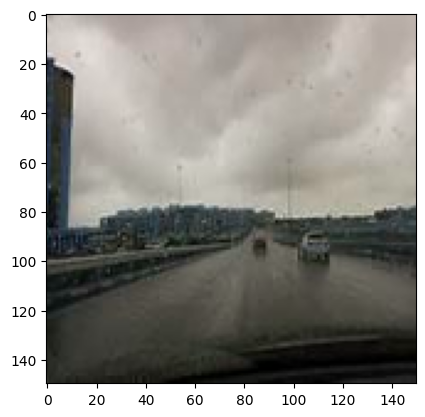

In [20]:
# display some X_test, y_test
idx = 0
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [21]:
# Define your model here
from keras.models import Sequential
from keras import layers

In [22]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

_input_shape = (150, 150, 3)
_epochs = 100
_batch_size = 64
_loss = "categorical_crossentropy"

## Model 1

In [23]:
Model_1 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=_input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
print(Model_1.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_1.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_1 = Model_1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 124)     3472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 124)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        71488     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

## Model 2
Diff stacture

In [24]:
%time
Model_2 = Sequential([
    layers.Conv2D(filters=150,kernel_size=(3,3),activation='tanh',input_shape=_input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(9248, activation='relu'),
    layers.Dense(4624, activation='relu'),
    layers.Dense(2312, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='softmax')
])
print(Model_2.summary())


Model_2.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_2= Model_2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 150)     4200      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 150)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        86464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        18464     
                                                        

## Model 3 Dropout

In [25]:
Model_3 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.3),
    layers.Dense(5, activation='softmax')
])
print(Model_3.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_3.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_3 = Model_3.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 124)     3472      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 124)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        71488     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 17, 17, 32)       

In [26]:
Model_4 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.7),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.8),
    layers.Dense(5, activation='softmax')
])
print(Model_4.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_4.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_4 = Model_4.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 124)     3472      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 124)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        71488     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 32)       

### Plot learning Curves

***Type your code here***

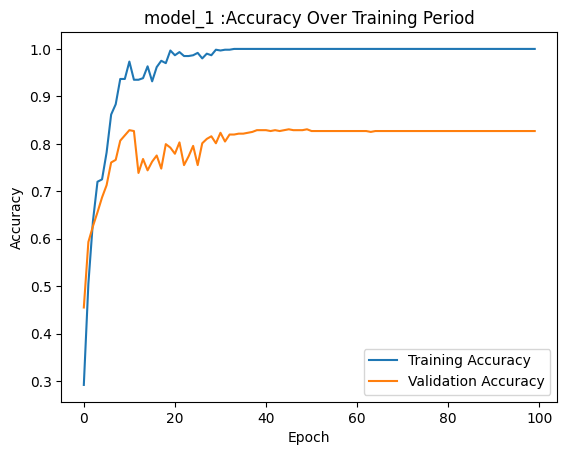

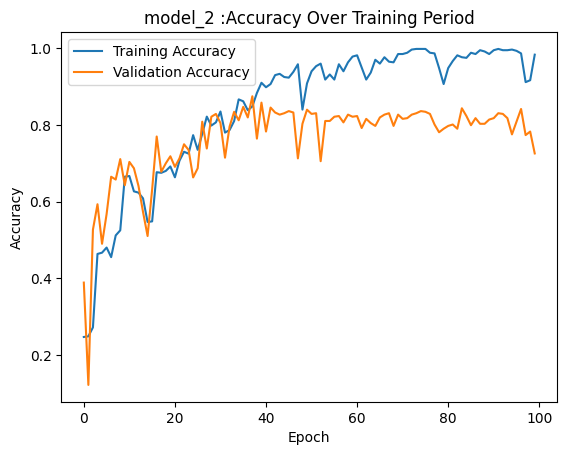

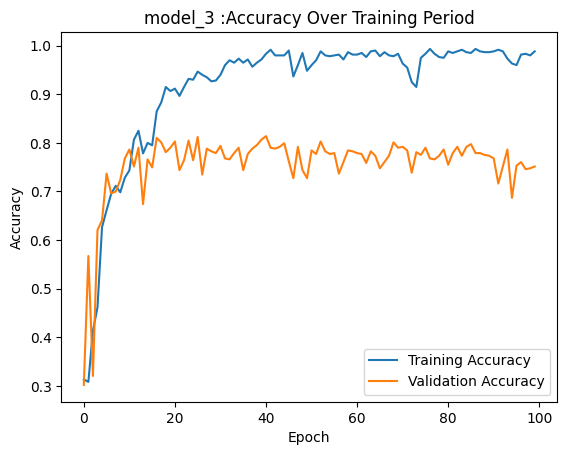

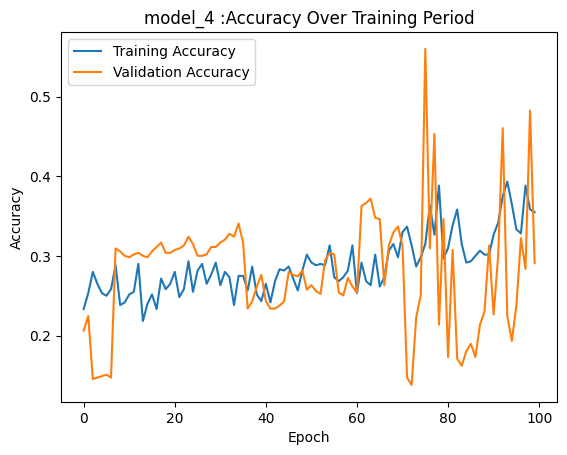

In [27]:
# Plot training and validation accuracy

def plot_history(model_number,history):
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  # plt.plot(history.history['loss'],label='Loss')
  # plt.plot(history.history['val_loss'],label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'{model_number} :Accuracy Over Training Period')
  plt.legend()
  plt.show()

plot_history('model_1',history_1)
plot_history('model_2',history_2)
plot_history('model_3',history_3)
plot_history('model_4',history_4)

### Evaluating the model out-of-sample

In [28]:
# Type your code here
def evaluate(model_name,model):
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"{model_name} Test accuracy: {test_acc:.3f}")
evaluate("Model_1",Model_1)
evaluate("Model_2",Model_2)
evaluate("Model_3",Model_3)
evaluate("Model_4",Model_4)

17/17 [==============================] - 1s 12ms/step - loss: 2.1017 - accuracy: 0.8269
Model_1 Test accuracy: 0.827
17/17 [==============================] - 1s 22ms/step - loss: 1.9276 - accuracy: 0.7256
Model_2 Test accuracy: 0.726
17/17 [==============================] - 0s 12ms/step - loss: 2.5737 - accuracy: 0.7514
Model_3 Test accuracy: 0.751
17/17 [==============================] - 0s 12ms/step - loss: 1.2893 - accuracy: 0.2910
Model_4 Test accuracy: 0.291


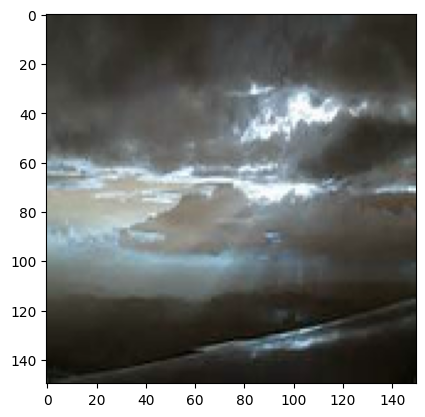

1/1 [==============================] - 0s 18ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


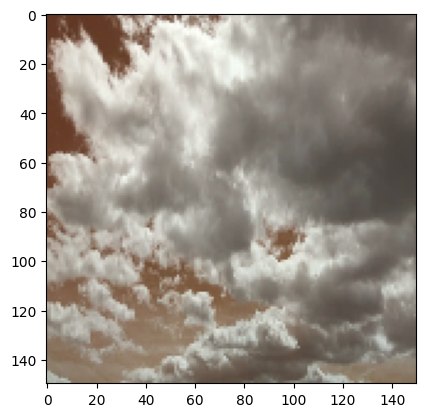

1/1 [==============================] - 0s 19ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: rain


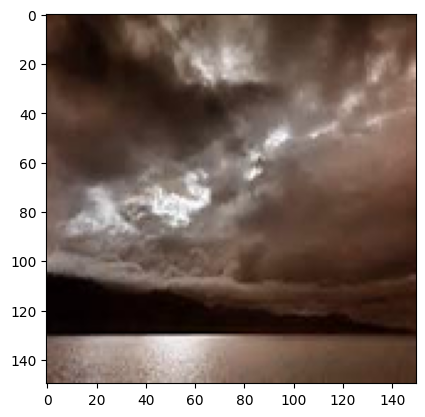

1/1 [==============================] - 0s 18ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


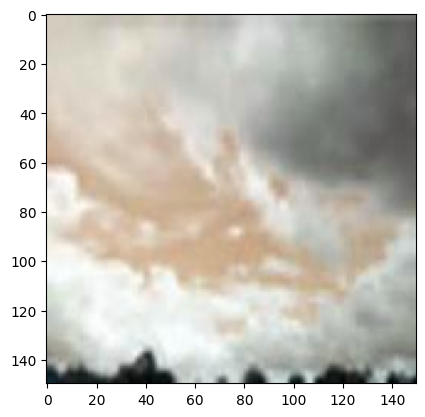

1/1 [==============================] - 0s 19ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: rain


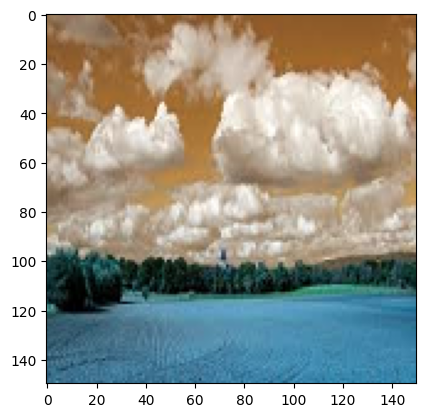

1/1 [==============================] - 0s 17ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


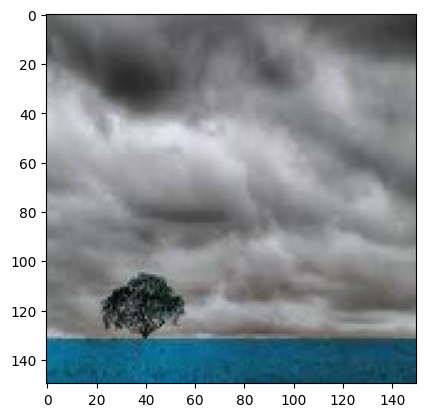

1/1 [==============================] - 0s 17ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: rain


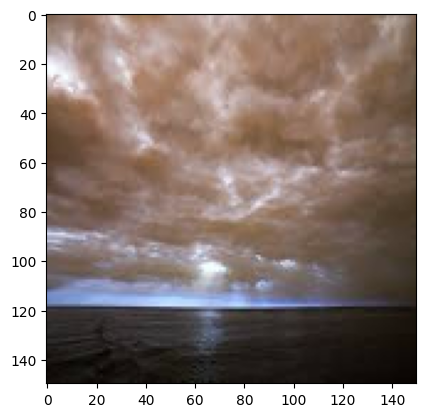

1/1 [==============================] - 0s 19ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


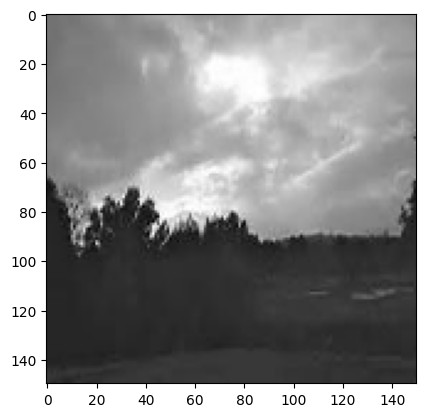

1/1 [==============================] - 0s 19ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


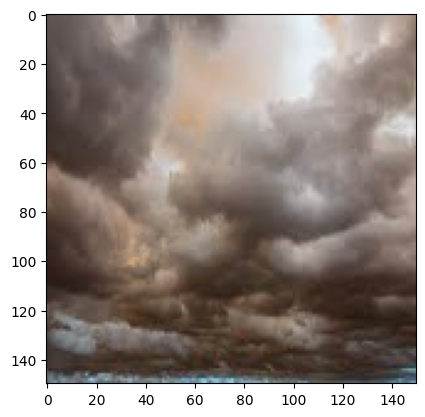

1/1 [==============================] - 0s 17ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


In [37]:
# Display some images
def predict_one_image(idx):
  image = train_set[idx]
  cv2.imread(image, cv2.IMREAD_COLOR)
  img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
  plt.imshow(img)
  plt.show()

  import numpy as np
  from PIL import Image
  image = Image.open(image).resize((150, 150))  # Resize the image to 150x150 pixels
  image = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
  image = np.expand_dims(image, axis=0)

  predicted_probabilities_1 = Model_1.predict(image)
  predicted_probabilities_2 = Model_2.predict(image)
  predicted_probabilities_3 = Model_3.predict(image)
  predicted_probabilities_4 = Model_4.predict(image)

  predicted_class = np.argmax(predicted_probabilities_1)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_2)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_3)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_4)
  print(f"Predicted class: {Result[predicted_class]}")


for i in range(1,10):
  predict_one_image(i)

### Comment on your results



